In [200]:
import pandas as pd
import numpy as np
#standard scaler for range of values, minmaxscaler for binary values
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


Preprocessing data

In [201]:
df=pd.read_csv('diabetes_prediction_dataset.csv')

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [203]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [204]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [205]:
# 1 == diabetes
# 0 != diabetes
df["diabetes"].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [206]:
df["diabetes"]=df["diabetes"].astype("category")

<Axes: xlabel='diabetes', ylabel='count'>

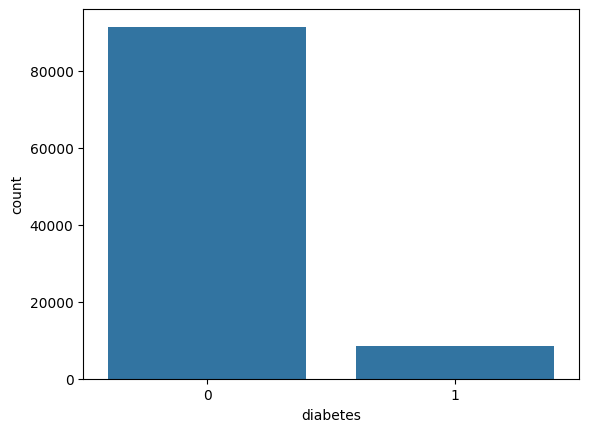

In [207]:
sns.countplot(df,x="diabetes")

In [208]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [209]:
df["gender"]=df["gender"].map({"Male":1,"Female":0,"Other":1})
df["gender"].astype('int')

0        0
1        0
2        1
3        0
4        1
        ..
99995    0
99996    0
99997    1
99998    0
99999    0
Name: gender, Length: 100000, dtype: int32

In [210]:
df["smoking_history"].value_counts()


smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [211]:
#-1 : no info
# 0 : never smoke
# 1 : have smoked
smokehistory = {"No Info": 0, "never": 0}
for key in ["former", "current", "not current", "ever"]:
    smokehistory[key] = 1

In [212]:
smokehistory

{'No Info': 0,
 'never': 0,
 'former': 1,
 'current': 1,
 'not current': 1,
 'ever': 1}

In [213]:
df['smoking_history']=df['smoking_history'].map(smokehistory)

In [214]:
df.groupby('diabetes').mean()

C:\Users\Darren\AppData\Local\Temp\ipykernel_27768\4096129012.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('diabetes').mean()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
diabetes,,,,,,,,
0,0.408842,40.115187,0.058984,0.029235,0.277475,26.887163,5.396761,132.852470
1,0.475176,60.946588,0.245647,0.149059,0.435294,31.988382,6.934953,194.094706


IF THERE IS A RANGE OF DATA: standardize it

In [215]:
binary_columns = ['gender', 'smoking_history','hypertension','heart_disease']
numeric_columns = ['age','bmi','HbA1c_level','blood_glucose_level']

In [216]:
df[binary_columns]

,gender,smoking_history,hypertension,heart_disease
0,0,0,0,1
1,0,0,0,0
2,1,0,0,0
3,0,1,0,0
4,1,1,1,1
...,...,...,...,...
99995,0,0,0,0
99996,0,0,0,0
99997,1,1,0,0
99998,0,0,0,0


In [217]:
binaryscaler = MinMaxScaler()
df[binary_columns] = binaryscaler.fit_transform(df[binary_columns])

# Scale features with a range of values
numericalscaler = StandardScaler()  # or MinMaxScaler()
df[numeric_columns] = numericalscaler.fit_transform(df[numeric_columns])

In [218]:
newdf=pd.concat([df[binary_columns],df[numeric_columns]],axis=1)

In [219]:
newdf.head()

,gender,smoking_history,hypertension,heart_disease,age,bmi,HbA1c_level,blood_glucose_level
0,0.0,0.0,0.0,1.0,1.692704,-0.321056,1.001706,0.047704
1,0.0,0.0,0.0,0.0,0.538006,-0.000116,1.001706,-1.426210
2,1.0,0.0,0.0,0.0,-0.616691,-0.000116,0.161108,0.489878
3,0.0,1.0,0.0,0.0,-0.261399,-0.583232,-0.492690,0.416183
4,1.0,1.0,1.0,1.0,1.515058,-1.081970,-0.679490,0.416183


In [220]:
newdf.shape

(100000, 8)

In [221]:
df.shape

(100000, 9)

Seperating Labels and results

In [222]:
#labels into X df
X=newdf
#results into Y series
Y=df['diabetes']

Spliting test/train Data

In [223]:
#Stratify to split Y same proportion both test and train set
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,train_size=0.8,stratify=Y,random_state=1)

In [224]:
#checking
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (80000, 8)
X_test shape: (20000, 8)
Y_train shape: (80000,)
Y_test shape: (20000,)


Train model time!!

In [225]:
classfier=svm.SVC(kernel='linear')

In [226]:
classfier.fit(X_train,Y_train)

SVC(kernel='linear')

Evaluation

In [227]:
train_prediction=classfier.predict(X_train)
train_accuracy=accuracy_score(train_prediction,Y_train)

In [228]:
print(f"training accuracy : {train_accuracy}")

training accuracy : 0.9611


In [229]:
test_prediction=classfier.predict(X_test)
test_accuracy=accuracy_score(test_prediction,Y_test)

In [230]:
print(f"testing accuracy :{test_accuracy}")

testing accuracy :0.9598


Prediction System

In [231]:
hmap={"Male":1,"Female":0,"No Info":0,"never":0,"former":1,"current":1,"not current":1,"ever":1}

def conversion(listt):
    for i in range(len(listt)):
        if listt[i] in hmap:
            listt[i]=hmap[listt[i]]
    return listt


In [232]:
def model_result(selected_df,classfier):
    res=classfier.predict(selected_df)
    if res[0] ==0:
        return("No Diabetes")
    elif res[0]==1:
        return("Have Diabetes")
    

standardizing it

In [233]:
#standardizing function
def standardize_input_values(listt):
   #converting listt into numpy array and reshaping it so to not confuse model
   converted_data=np.asarray(listt).reshape(1,-1)

   column_headers = ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level']
    # Create DataFrame
   inputdf = pd.DataFrame(converted_data, columns=column_headers)

   #splitting df into binary/numerical ones as scaler only accepts df
   binarydf=inputdf[binary_columns]
   numericaldf=inputdf[numeric_columns]

   #standardizing binary values

   binarydf[binary_columns] = binaryscaler.transform(binarydf)
   #standarizing numerical/range values
   numericaldf[numeric_columns]=numericalscaler.transform(numericaldf)

   #concat into 1 df that will be the input parameter

   finaldf=pd.concat([binarydf,numericaldf],axis=1)

   return finaldf


In [234]:
#Female guest: she has no diabetes
#Male guest: he has diabetes
input_female=["Female",15.0,0,0,"never",19.9,6.6,85]
input_male=["Male",80.0,0,1,"former",24.36,7.5,280]

converted_female_data=conversion(input_female)
converted_male_data=conversion(input_male)








In [235]:
#Male client: should have diabetes
predicting_parameter=standardize_input_values(converted_male_data)
print(model_result(predicting_parameter,classfier))

Have Diabetes


C:\Users\Darren\AppData\Local\Temp\ipykernel_27768\263210957.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binarydf[binary_columns] = binaryscaler.transform(binarydf)
C:\Users\Darren\AppData\Local\Temp\ipykernel_27768\263210957.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericaldf[numeric_columns]=numericalscaler.transform(numericaldf)


In [236]:
#Female client: should not have diabetes
predicting_parameter=standardize_input_values(converted_female_data)
print(model_result(predicting_parameter,classfier))

No Diabetes


C:\Users\Darren\AppData\Local\Temp\ipykernel_27768\263210957.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binarydf[binary_columns] = binaryscaler.transform(binarydf)
C:\Users\Darren\AppData\Local\Temp\ipykernel_27768\263210957.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numericaldf[numeric_columns]=numericalscaler.transform(numericaldf)
